In [91]:
#Import libraries 
import pandas as pd
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
df_consum = pd.read_csv("C:/Maryam/ODU/Fall2021/DataVisualisation/HWs/HW6/Data/U.S._Product_Supplied_of_Finished_Motor_Gasoline.csv",error_bad_lines=False)
df_price = pd.read_csv("C:/Maryam/ODU/Fall2021/DataVisualisation/HWs/HW6/Data/U.S._Regular_All_Formulations_Retail_Gasoline_Prices.csv",error_bad_lines=False)

C:\Users\Maryam\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [93]:
print(df_consum.shape)
df_consum.head()

(920, 2)


,Month,U.S. Product Supplied of Finished Motor Gasoline Thousand Barrels per Day
0,Aug-21,9111
1,Jul-21,9313
2,Jun-21,9273
3,May-21,9137
4,Apr-21,8791


In [94]:
print(df_price.shape)
df_price.head()

(374, 2)


,Month,U.S. Regular All Formulations Retail Gasoline Prices Dollars per Gallon
0,21-Oct,3.291
1,21-Sep,3.175
2,21-Aug,3.158
3,21-Jul,3.136
4,21-Jun,3.064


In [95]:
df_price.drop([0,1],inplace=True)

In [96]:
df_price.head()

,Month,U.S. Regular All Formulations Retail Gasoline Prices Dollars per Gallon
2,21-Aug,3.158
3,21-Jul,3.136
4,21-Jun,3.064
5,21-May,2.985
6,21-Apr,2.858


In [97]:
df_consum.drop(df_consum.index[372:920], inplace=True)

In [98]:
print(len(df_price))
print(len(df_consum))

372
372


In [99]:
#df_price.reset_index(drop=True, inplace=True)

In [100]:
#df_consum.reset_index(drop=True, inplace=True)

In [101]:
frames =[df_consum, df_price]
df_consum.index = df_price.index
data = pd.concat(frames, axis=1)
data.head()

,Month,U.S. Product Supplied of Finished Motor Gasoline Thousand Barrels per Day,Month,U.S. Regular All Formulations Retail Gasoline Prices Dollars per Gallon
2,Aug-21,9111,21-Aug,3.158
3,Jul-21,9313,21-Jul,3.136
4,Jun-21,9273,21-Jun,3.064
5,May-21,9137,21-May,2.985
6,Apr-21,8791,21-Apr,2.858


In [102]:
main_data = data.loc[:,~data.columns.duplicated()]

In [103]:
main_data.head()

,Month,U.S. Product Supplied of Finished Motor Gasoline Thousand Barrels per Day,U.S. Regular All Formulations Retail Gasoline Prices Dollars per Gallon
2,Aug-21,9111,3.158
3,Jul-21,9313,3.136
4,Jun-21,9273,3.064
5,May-21,9137,2.985
6,Apr-21,8791,2.858


In [104]:
main_data.rename(columns={"U.S. Product Supplied of Finished Motor Gasoline Thousand Barrels per Day": "Consumption", "U.S. Regular All Formulations Retail Gasoline Prices Dollars per Gallon": "Price"}, inplace=True)

C:\Users\Maryam\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [105]:
main_data.describe()

,Consumption,Price
count,372.000000,370.000000
mean,8592.819892,2.085281
std,729.826492,0.880164
min,5866.000000,0.921000
25%,8120.750000,1.202500
50%,8797.500000,2.095000
75%,9148.000000,2.768250
max,9834.000000,4.062000


In [106]:
main_data.shape

(372, 3)

In [107]:
main_data.isnull().sum()

Month          0
Consumption    0
Price          2
dtype: int64

In [108]:
main_data.dropna(inplace=True)

C:\Users\Maryam\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [109]:
main_data.shape

(370, 3)

Text(0, 0.5, 'Value ($/Gallon)')

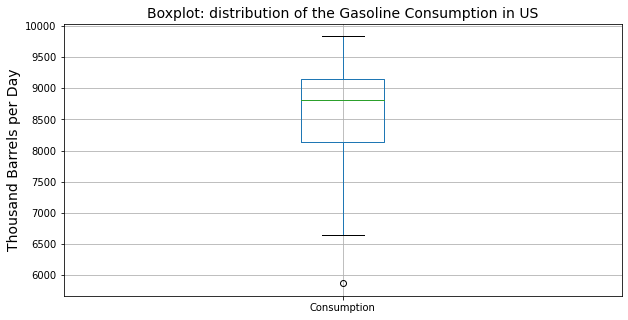

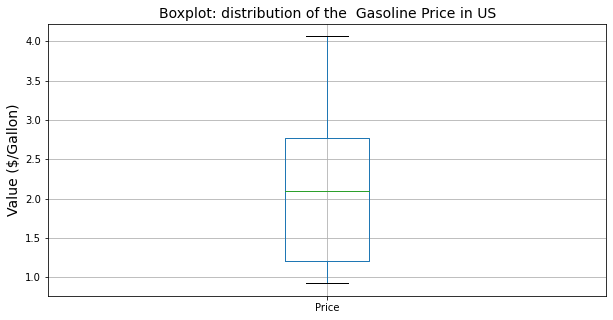

In [110]:
# make boxplot
plt.figure(figsize=(10, 5))
boxplot_cons= main_data.boxplot(column=['Consumption'])
plt.title('Boxplot: distribution of the Gasoline Consumption in US',fontsize=14, color='black')
plt.ylabel('Thousand Barrels per Day', fontsize=14, color='black')

plt.figure(figsize=(10, 5))
boxplot_price = main_data.boxplot(column=['Price'])
plt.title('Boxplot: distribution of the  Gasoline Price in US',fontsize=14, color='black')
plt.ylabel('Value ($/Gallon)', fontsize=14, color='black')

Text(0, 0.5, 'Frequency')

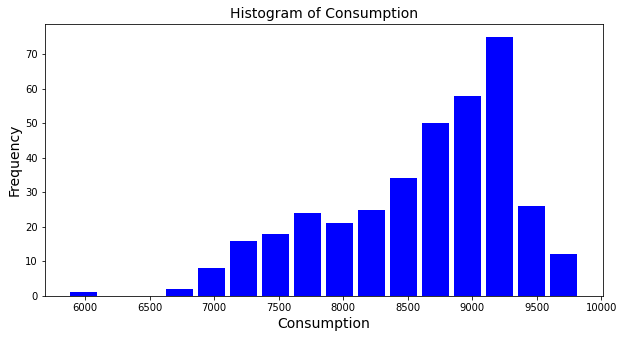

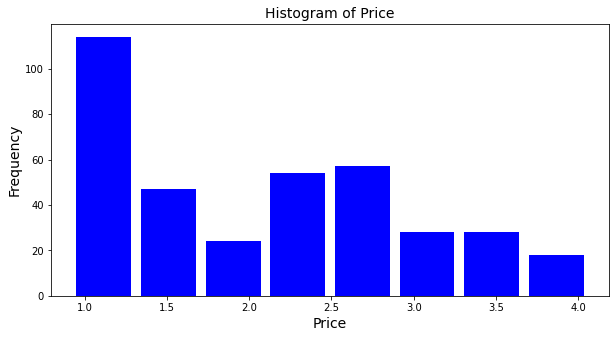

In [111]:
# Creating Histogram
plt.figure(figsize=(10, 5))
plt.hist(x = main_data['Consumption'], bins=16, color='blue', rwidth=0.85)
plt.title('Histogram of Consumption',fontsize=14, color='black')
plt.xlabel('Consumption', fontsize=14, color='black')
plt.ylabel('Frequency', fontsize=14, color='black')



plt.figure(figsize=(10, 5))
#bins_list = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5]
plt.hist(x = main_data['Price'], bins=8, color='blue', rwidth=0.85)
plt.title('Histogram of Price',fontsize=14, color='black')
plt.xlabel('Price', fontsize=14, color='black')
plt.ylabel('Frequency', fontsize=14, color='black')

Text(0.5, 1.0, 'eCDF for Consumption using seaborn library ')

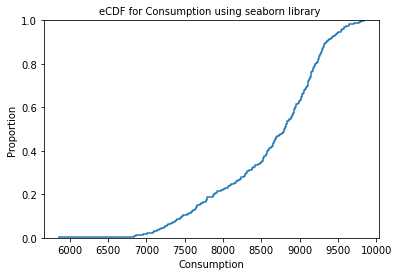

In [112]:
#Import seaborn library and generate ecdf plot
import seaborn as sns
sns.ecdfplot(x = main_data['Consumption'])
plt.title('eCDF for Consumption using seaborn library ',fontsize=10, color='black')

Text(0.5, 1.0, 'eCDF for Price using seaborn library ')

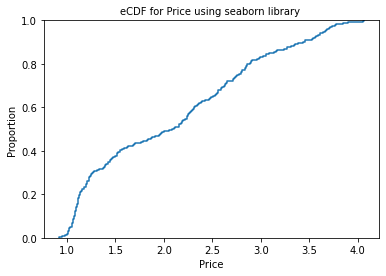

In [113]:
sns.ecdfplot(x = main_data['Price'])
plt.title('eCDF for Price using seaborn library ',fontsize=10, color='black')

In [114]:
main_data.head()

,Month,Consumption,Price
2,Aug-21,9111,3.158
3,Jul-21,9313,3.136
4,Jun-21,9273,3.064
5,May-21,9137,2.985
6,Apr-21,8791,2.858


In [115]:
import datetime
main_data['Month-Year']=[datetime.datetime.strptime(x,'%b-%y').strftime('%m-%Y') for x in main_data['Month']]


C:\Users\Maryam\AppData\Local\Temp/ipykernel_14188/3304071028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_data['Month-Year']=[datetime.datetime.strptime(x,'%b-%y').strftime('%m-%Y') for x in main_data['Month']]


In [116]:
main_data['Year']=''
for i in range(len( main_data)):
    main_data['Year'].values[i]= pd.to_numeric(main_data['Month-Year'].values[i][3:7])

C:\Users\Maryam\AppData\Local\Temp/ipykernel_14188/3338716879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_data['Year']=''


In [117]:
main_data.head(30)

,Month,Consumption,Price,Month-Year,Year
2,Aug-21,9111,3.158,08-2021,2021
3,Jul-21,9313,3.136,07-2021,2021
4,Jun-21,9273,3.064,06-2021,2021
5,May-21,9137,2.985,05-2021,2021
6,Apr-21,8791,2.858,04-2021,2021
7,Mar-21,8577,2.810,03-2021,2021
8,Feb-21,7744,2.501,02-2021,2021
9,Jan-21,7666,2.334,01-2021,2021
10,Dec-20,7855,2.195,12-2020,2020
11,Nov-20,8001,2.108,11-2020,2020


In [118]:
final_data = main_data.groupby(['Year']).mean()
final_data.head()

,Consumption,Price
Year,,
1990,7127.000000,1.305667
1991,7233.636364,1.095182
1992,7266.166667,1.085750
1993,7474.333333,1.067083
1994,7599.166667,1.074417


In [119]:
final_data.shape

(32, 2)

In [120]:
df_final = final_data.reset_index()

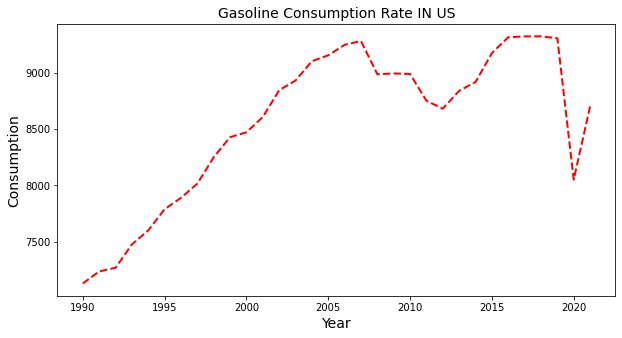

In [144]:
plt.figure(figsize=(10, 5))
plt.plot('Year', 'Consumption', data= df_final, linewidth=2,linestyle='--', color = 'red')
plt.title('Gasoline Consumption Rate IN US',fontsize=14, color='black')
plt.xlabel('Year', fontsize=14, color='black')
plt.ylabel('Consumption', fontsize=14, color='black')
plt.show()

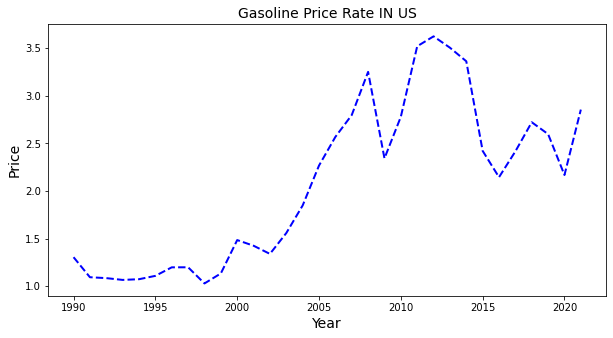

In [143]:
plt.figure(figsize=(10, 5))
plt.plot('Year', 'Price', data= df_final, linewidth=2, linestyle='--', color = 'blue')
plt.title('Gasoline Price Rate IN US',fontsize=14, color='black')
plt.xlabel('Year', fontsize=14, color='black')
plt.ylabel('Price', fontsize=14, color='black')
plt.show()

In [123]:
# Highest Consumption Date
high_consumption = main_data[main_data['Consumption']>9700] 
high_consumption

,Month,Consumption,Price,Month-Year,Year
26,Aug-19,9834,2.621,08-2019,2019
28,Jun-19,9703,2.716,06-2019,2019
38,Aug-18,9778,2.836,08-2018,2018
40,Jun-18,9797,2.891,06-2018,2018
50,Aug-17,9752,2.380,08-2017,2017
52,Jun-17,9772,2.347,06-2017,2017


In [124]:
# Highest Price Date
high_price = main_data[main_data['Price']>3.85] 
high_price

,Month,Consumption,Price,Month-Year,Year
114,Apr-12,8741,3.900,04-2012,2012
115,Mar-12,8582,3.852,03-2012,2012
125,May-11,8817,3.906,05-2011,2011
159,Jul-08,9150,4.062,07-2008,2008
160,Jun-08,9110,4.054,06-2008,2008


In [125]:
main_data.head()

,Month,Consumption,Price,Month-Year,Year
2,Aug-21,9111,3.158,08-2021,2021
3,Jul-21,9313,3.136,07-2021,2021
4,Jun-21,9273,3.064,06-2021,2021
5,May-21,9137,2.985,05-2021,2021
6,Apr-21,8791,2.858,04-2021,2021


In [126]:
main_data[main_data['Consumption']>4] 

,Month,Consumption,Price,Month-Year,Year
2,Aug-21,9111,3.158,08-2021,2021
3,Jul-21,9313,3.136,07-2021,2021
4,Jun-21,9273,3.064,06-2021,2021
5,May-21,9137,2.985,05-2021,2021
6,Apr-21,8791,2.858,04-2021,2021
...,...,...,...,...,...
367,Mar-91,7017,1.040,03-1991,1991
368,Feb-91,6838,1.094,02-1991,1991
371,Nov-90,7241,1.324,11-1990,1990
372,Oct-90,7226,1.335,10-1990,1990


In [127]:
#main_data.loc[main_data['Month'].str.contains('21', case=False)] = 21

In [128]:
main_data.head()

,Month,Consumption,Price,Month-Year,Year
2,Aug-21,9111,3.158,08-2021,2021
3,Jul-21,9313,3.136,07-2021,2021
4,Jun-21,9273,3.064,06-2021,2021
5,May-21,9137,2.985,05-2021,2021
6,Apr-21,8791,2.858,04-2021,2021


In [131]:
data_gas_2020 = main_data[main_data['Year']==2020]

In [133]:
data_gas_2020.head()

,Month,Consumption,Price,Month-Year,Year
10,Dec-20,7855,2.195,12-2020,2020
11,Nov-20,8001,2.108,11-2020,2020
12,Oct-20,8316,2.158,10-2020,2020
13,Sep-20,8541,2.183,09-2020,2020
14,Aug-20,8524,2.182,08-2020,2020


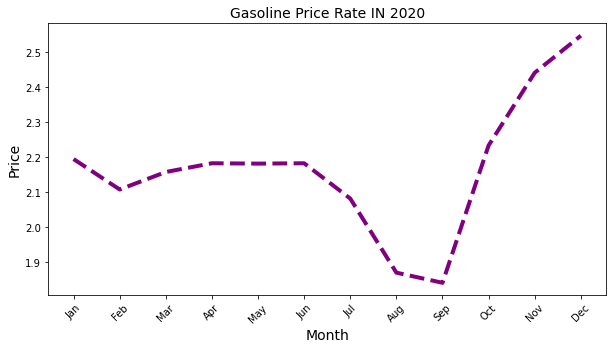

In [142]:
plt.figure(figsize=(10, 5))
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep', 'Oct', 'Nov', 'Dec']
plt.plot(month, data_gas_2020['Price'], linewidth=4, linestyle='--', color = 'purple')
plt.title('Gasoline Price Rate IN 2020',fontsize=14, color='black')
plt.xlabel('Month', fontsize=14, color='black')
plt.ylabel('Price', fontsize=14, color='black')
plt.xticks(rotation = 45)
plt.show()

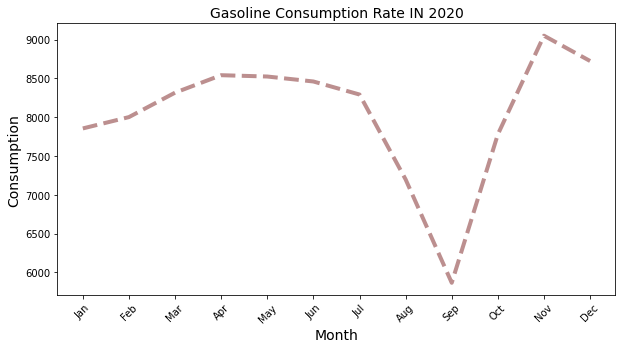

In [180]:
plt.figure(figsize=(10, 5))
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep', 'Oct', 'Nov', 'Dec']
plt.plot(month, data_gas_2020['Consumption'], linewidth=4, linestyle='--', color = 'rosybrown')
plt.title('Gasoline Consumption Rate IN 2020',fontsize=14, color='black')
plt.xlabel('Month', fontsize=14, color='black')
plt.ylabel('Consumption', fontsize=14, color='black')
plt.xticks(rotation = 45)
plt.show()

In [148]:
data_gas_2018 = main_data[main_data['Year']==2018]
data_gas_2019 = main_data[main_data['Year']==2019]
data_gas_2021 = main_data[main_data['Year']==2021]

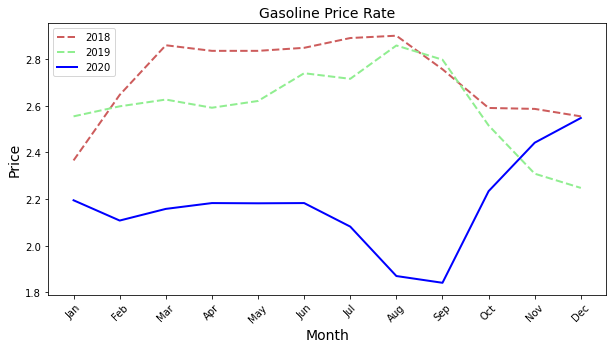

In [176]:
# Create gas price chart for years before 2020
plt.figure(figsize=(10, 5))
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep', 'Oct', 'Nov', 'Dec']
plt.plot(month, data_gas_2018['Price'], linewidth=2, linestyle='--', color = 'indianred', label='2018')
plt.plot(month, data_gas_2019['Price'], linewidth=2, linestyle='--', color = 'lightgreen', label='2019')
plt.plot(month, data_gas_2020['Price'], linewidth=2, linestyle='-', color = 'blue', label='2020')
plt.title('Gasoline Price Rate',fontsize=14, color='black')
plt.xlabel('Month', fontsize=14, color='black')
plt.ylabel('Price', fontsize=14, color='black')
plt.xticks(rotation = 45)
plt.legend(loc="upper left")
plt.show()

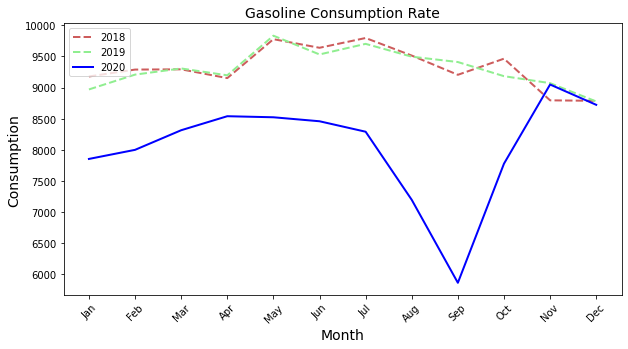

In [178]:
# Create gas consumption chart for years before 2020
plt.figure(figsize=(10, 5))
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep', 'Oct', 'Nov', 'Dec']
plt.plot(month, data_gas_2018['Consumption'], linewidth=2, linestyle='--', color = 'indianred', label='2018')
plt.plot(month, data_gas_2019['Consumption'], linewidth=2, linestyle='--', color = 'lightgreen', label='2019')
plt.plot(month, data_gas_2020['Consumption'], linewidth=2, linestyle='-', color = 'blue', label='2020')
plt.title('Gasoline Consumption Rate',fontsize=14, color='black')
plt.xlabel('Month', fontsize=14, color='black')
plt.ylabel('Consumption', fontsize=14, color='black')
plt.xticks(rotation = 45)
plt.legend(loc="upper left")
plt.show()